<a href="https://colab.research.google.com/github/ev1025/CS_Project1/blob/main/AI_15_%EC%9D%B4%EC%A7%84%EC%9A%B0_Section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section. 1 Project 게임데이터 분석

# 가설
1. 지역에 따라서 선호하는 게임 장르가 다를 것이다.
2. 연도별 게임의 트렌드가 있을 것이다.
3. 출고량이 높은 게임은 특징을 가지고 있을 것이다.


# 데이터 소개
- Name : 게임의 이름입니다.    
- Platform : 게임이 지원되는 플랫폼의 이름입니다    
- Year : 게임이 출시된 연도입니다.    
- Genre : 게임의 장르입니다.    
- Publisher : 게임을 제작한 회사입니다.    
- NA_Sales : 북미지역에서의 출고량입니다.   
- EU_Sales : 유럽지역에서의 출고량입니다.    
- JP_Sales : 일본지역에서의 출고량입니다.   
- Other_Sales : 기타지역에서의 출고량입니다.    

# 전처리

In [1]:
# from google.colab import files
# files.upload();

In [2]:
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import math
import copy 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
scaler = StandardScaler()
plt.style.use('fivethirtyeight')

In [3]:
rawdata = pd.read_csv('vgames2.csv')
df = pd.read_csv('vgames2.csv')
df = df.iloc[:,1:] # 불필요한 인덱스 제거

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


### **년도가 부정확한 정보가 많아서 값이 높은 데이터의 년도를 수기로 변경**

In [5]:
df[df.Year.isnull()].head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
273,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
358,Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,Unknown,0.03,0,0,0
430,Famista 64,N64,NaN,Sports,Namco Bandai Games,0,0,0.17,0.03


In [6]:
# 판매량 데이터 높은 값만 수정
df.iat[6949,3] = 2004
df.iat[16275,3] = 1978
df.iat[13327,3] = 2001
df.iat[31,3] = 2007
df.iat[3347,3] = 2008
df.iat[3562,3] = 2006
df.iat[8529,3] = 2008
df.iat[4181,3] = 2007
df.iat[5720,3] = 1980
df.iat[2130,3] = 2006
df.iat[10965,3] = 2004

In [7]:
df.dropna(axis=0, subset=['Year'],inplace=True)
df.reset_index(inplace=True, drop= True)
df.Year = df.Year.astype(int)

### **장르의 결측값 중 판매량이 높은 데이터에 대해서 수기로 변경**

In [8]:
df[df['Genre'].isnull()].head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
49,Ape Escape: On the Loose,PSP,2005,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
404,NBA Ballers,XB,2004,NaN,Midway Games,0.37,0.11,0,0.02
1312,NFL Street,XB,2004,NaN,Electronic Arts,0.49,0.15,0,0.02
1562,SingStar Singalong With Disney,PS2,2008,NaN,Sony Computer Entertainment,0,0.04,0,0.57
1946,Pokemon X/Pokemon Y,3DS,2013,NaN,Nintendo,5170K,4.05,4.34,0.79


In [9]:
df.Genre.value_counts() # 장르의 종류별 

Action          3242
Sports          2299
Misc            1705
Role-Playing    1466
Shooter         1280
Adventure       1270
Racing          1220
Platform         874
Simulation       849
Fighting         835
Strategy         670
Puzzle           567
Name: Genre, dtype: int64

In [10]:
# 판매량 높은 장르 결측값 등록
df.iat[1946,4] = 'Role-Playing' 
df.iat[9348,4] = 'Adventure'
df.iat[4523,4] = 'Misc'
df.iat[16316,4] = 'Racing'
df.iat[3871,4] = 'Sports'
df.iat[15268,4] = 'Role-Playing'
df.iat[12135,4] = 'Adventure'

In [11]:
df.dropna(axis = 0 , subset=['Genre'], inplace=True)
df.reset_index(inplace=True, drop=True)

In [12]:
df[df['Publisher'].isna()].head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
269,UK Truck Simulator,PC,2010,Simulation,NaN,0,0.03,0,0
1295,All Grown Up!: Game Boy Advance Video Volume 1,GBA,2004,Misc,NaN,0.17,0.06,0,0
1538,Teenage Mutant Ninja Turtles: Game Boy Advance...,GBA,2004,Misc,NaN,0.12,0.04,0,0
1764,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004,Misc,NaN,0.16,0.06,0,0
1932,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004,Misc,NaN,0.46,0.17,0,0.01


In [13]:
df.dropna(axis = 0 , subset=['Publisher'],inplace = True)  # Publisher 출고량 높은 사항없어서 모두 제거
df.reset_index(inplace=True, drop=True)

In [14]:
df.duplicated().sum()

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16241 non-null  object
 1   Platform     16241 non-null  object
 2   Year         16241 non-null  int64 
 3   Genre        16241 non-null  object
 4   Publisher    16241 non-null  object
 5   NA_Sales     16241 non-null  object
 6   EU_Sales     16241 non-null  object
 7   JP_Sales     16241 non-null  object
 8   Other_Sales  16241 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.1+ MB


### **출고량에 M과 K로 기록된 데이터들을 수치데이터로 변환**

In [16]:
df.NA_Sales = df.NA_Sales.str.replace("M","").str.replace('K','000').astype(float)
K_index = df[df['NA_Sales'] >10]
K_index = K_index['NA_Sales']
K_1000 = K_index/1000000
df.loc[K_1000.index,'NA_Sales'] = K_1000
df['NA_Sales'] = round(df['NA_Sales'],2)

df.EU_Sales = df.EU_Sales.str.replace('M','').str.replace('K','000').astype(float)
K_index2 = df[df['EU_Sales']>10]
K_index2 = K_index2['EU_Sales']
K_2000 = K_index2/1000000
df.loc[K_2000.index,'EU_Sales'] = K_2000
df['EU_Sales'] = round(df['EU_Sales'],2)

df.JP_Sales = df.JP_Sales.str.replace('M','').str.replace('K','000').astype(float)
k_index3 = df[df['JP_Sales']>10]
k_index3 = k_index3['JP_Sales']
k_3000 = k_index3/1000000
df.loc[k_3000.index,'JP_Sales'] = k_3000
df['JP_Sales'] = round(df['JP_Sales'],2)

df.Other_Sales = df.Other_Sales.str.replace('M','').str.replace('K','000').astype(float)
k_index4 = df[df['Other_Sales'] >10]
k_index4 = k_index4['Other_Sales']
k_4000 = k_index4/1000000
df.loc[k_4000.index,'Other_Sales'] = k_4000
df.Other_Sales = round(df.Other_Sales,2)

### **년도별 이상치를 정리하여 대입**

In [17]:
year_200 = df[df['Year']<10]               # 년도별 이상치 정리
year_200 = year_200.astype(str)
y200 = '200'+year_200['Year']

year_20 = df[(df['Year']>=10) & (df['Year']<80) ]
year_20 = year_20.astype(str)
y20 = '20'+year_20['Year']

year19 = df[(df['Year']>=80) & (df['Year']<100) ]
year19 = year19.astype('str')
y19 = '19' + year19['Year']

In [18]:
df.loc[y200.index,'Year'] = y200           # 정리한 이상치 대입
df.loc[y20.index,'Year'] = y20
df.loc[y19.index,'Year']=y19
df.Year = df.Year.astype(int)

In [19]:
Sales_sum = (df.loc[:,'NA_Sales']+df.loc[:,'EU_Sales']+df.loc[:,'JP_Sales']+df.loc[:,'Other_Sales']) 
df['Sales_sum'] = round(Sales_sum,2)  # 출고량 합계 피쳐 생성

In [20]:
# df.duplicated().sum()

In [21]:
# 2017년 이상 자료 놓친부분 전처리
df.iat[5196,2] = 2016
df.iat[14903,2] = 2016
df.iat[9911,2] = 2016
df.iat[6765,2] = 2009

# 가설1. 지역에 따라서 선호하는 게임 장르가 다를 것이다. Yes


In [22]:
df3 = copy.deepcopy(df)

In [23]:
df3.Genre.value_counts() # 장르 종류 확인

Action          3240
Sports          2299
Misc            1681
Role-Playing    1465
Shooter         1280
Adventure       1268
Racing          1219
Platform         873
Simulation       846
Fighting         835
Strategy         669
Puzzle           566
Name: Genre, dtype: int64

In [24]:
genre_group = df3.groupby('Genre').sum() # 장르별로 묶기
genre_group

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum
Genre,,,,,,
Action,6505616,858.75,513.64,156.60,173.42,1702.41
Adventure,2546304,101.79,63.66,51.87,16.70,234.02
Fighting,1673860,220.35,99.90,87.14,36.15,443.54
Misc,3374273,365.73,208.15,104.18,72.64,750.70
Platform,1749321,366.72,200.63,130.53,51.45,749.33
Puzzle,1134959,98.38,50.47,56.24,12.44,217.53
Racing,2443902,338.85,222.14,56.32,76.51,693.82
Role-Playing,2940337,307.49,183.09,332.71,56.73,880.02
Shooter,2567579,547.55,310.23,38.18,101.86,997.82


In [25]:
genre_na = genre_group['NA_Sales']
genre_eu = genre_group['EU_Sales']
genre_jp = genre_group['JP_Sales']
genre_ot = genre_group['Other_Sales']

- 그래프를 보시면 각 나라가 거의 비슷한 추세를 보이는 것을 알 수 있습니다.
- 대부분의 그룹에서 액션,슈터, 스포츠를 선호한다는 것을 알 수 있습니다.
- 일본의 출고량 같은경우 Role-playing 게임에서 특이점을 보여, 일본진출을 생각한다면 롤플레잉 게임을 제작하는 것이 유리하다고 볼 수 있습니다.

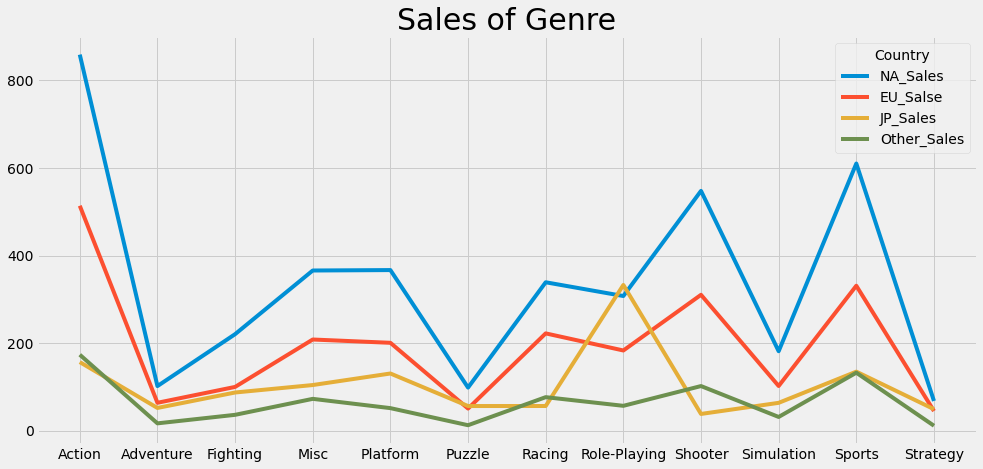

In [26]:
# 나라별 장르별 판매량 지표
plt.figure(figsize=(15,7))
plt.plot(genre_na)
plt.plot(genre_eu)
plt.plot(genre_jp)
plt.plot(genre_ot)
plt.title('Sales of Genre',fontsize=30)
plt.legend(['NA_Sales','EU_Salse','JP_Sales','Other_Sales'],title='Country')
plt.show();

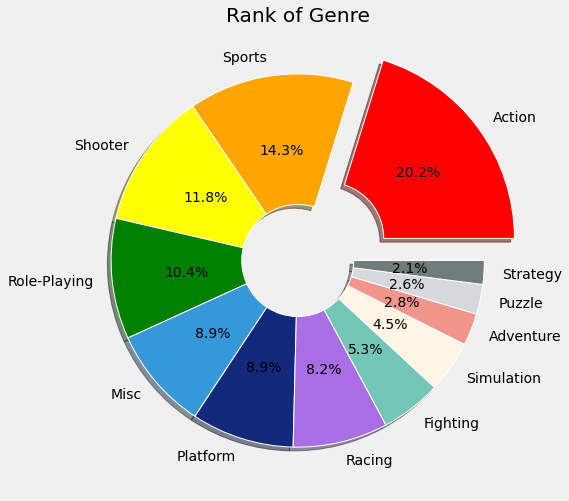

In [27]:
# 장르별 게임 판매 순위
genre_all = genre_group.iloc[:,5] # 장르별
genre_all = genre_all.sort_values(ascending =False)

labels_2 = ['Action','Sports', 'Shooter', 'Role-Playing', 'Misc', 'Platform', 'Racing','Fighting','Simulation', 'Adventure', 'Puzzle', 'Strategy']
explode_2 = [0.2, 0,0,0,0,0,0,0,0,0,0,0]
colors_2 = ['red','orange','yellow','green','#3498DB','#13297C','#A86FE5','#73C6B6','#FEF5E7','#F1948A','#D5D8DC','#707B7C']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}

plt.figure(figsize=(12,8))
plt.pie(genre_all, labels = labels_2,colors=colors_2, autopct='%.1f%%', explode =explode_2, wedgeprops=wedgeprops, shadow =True)  
plt.title("Rank of Genre")
plt.show();

# 가설2. 연도별 게임의 트렌드가 있을 것이다. No

**장르의 종류 및 개수 확인**
- 휴대용 게임: WiiU DS 3DS PSP PSV GBA SAT GB NG SCD WS
- 콘솔 게임 : Wii PS PS2 PS3 PS4 XB X360 XOne GC N64 SNES NES 2600 DC GEN 3DO - TG16 GG PCFX
- PC 게임 : PC

In [28]:
# 플랫폼을 3개로 나눔(휴대용, 콘솔, PC)
df2 = copy.deepcopy(df)

hand  = ["WiiU", "DS", "3DS",  "PSP", "PSV", "GBA", "SAT", "GB", "NG", "SCD", "WS"]  
for i in hand:
    df2['Platform'] = df2['Platform'].replace(i, "0")

consol = ["Wii", "PS", "PS2", "PS3", "PS4",  "XB",  "X360", "XOne", "GC", "N64", "SNES", "NES", "2600", "DC", "GEN", "3DO", "TG16", "GG", "PCFX"]
for j in consol:
    df2['Platform'] = df2['Platform'].replace(j,"1")
df2['Platform'] = df2['Platform'].replace('PC',"2")

df2[df2['Platform'].str.contains('([0-9])')==False] # 바뀌지 않은 것 있는지 확인

# 휴대용 : 0 , 콘솔 : 1 , PC : 2

<ipython-input-28-2d03d2580afe>:13: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df2[df2['Platform'].str.contains('([0-9])')==False] # 바뀌지 않은 것 있는지 확인


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum


In [29]:
portable = df2.query('Platform == "0"') # 그래프에 피쳐 엔지니어링
consol = df2.query('Platform == "1"')
pc = df2.query('Platform == "2"')


portable = portable.iloc[:,[2,9]]
consol = consol.iloc[:,[2,9]]
pc = pc.iloc[:,[2,9]]

portable = portable.groupby('Year').sum()
consol = consol.groupby('Year').sum()
pc = pc.groupby('Year').sum()

 
- 1980년 초, 콘솔게임 등장하였습니다. 이 시기에는 게임산업의 경쟁과열로 질이 낮은 게임들이 많이 출시되었습니다.
- 1983년 소비자들의 불만이 극에 달하였고 게임업계에서 가장 큰 재앙으로 불리는 아타리쇼크가 일어났습니다.
- 아타리쇼크는 당시 업계 거장이었던 아타리사가 저질 게임을 발매하면서 게임업계의 붕괴를 초래한 사건입니다.
- 이렇게 주춤했던 콘솔 게임은 1990년대 초반 닌텐도사의 '수퍼패미컴'이라는 게임기로 사람들의 다시 신임을 얻기 시작했고, 1994년 말, 누구나 한 번쯤 들어봤을 소니사의 플레이스테이션이 출시되면서 콘솔업계는 승승장구 하게됩니다.
-2000년대 중반에는 닌텐도DS와 플레이스테이션 포터블의 등장으로 포터블 산업의 전성기를 보였으나, 2010년 이후 모바일의 급격한 발전으로 게임산업 전반이 축소하는 것을 볼 수 있습니다.
- 전체적인 그래프 추세를 볼 때,콘솔게임이 지배적이었다는 것을 알 수 있고, 후반으로 갈수록 추세가 꺽이게 된 것은 모바일게임 등장의 영향으로 보입니다.

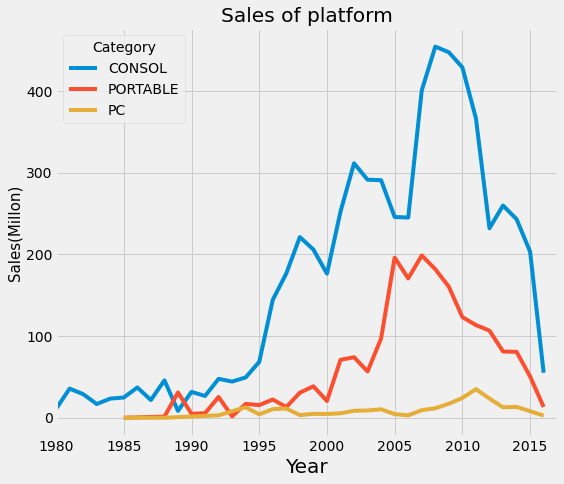

In [30]:
plt.figure(figsize=(8,7))
plt.plot(consol)
plt.plot(portable)
plt.plot(pc)
plt.title('Sales of platform')
plt.xlabel('Year',fontsize = 20)
plt.ylabel('Sales(Millon)', fontsize =15)
plt.xlim(1980,2017,1)
plt.legend(["CONSOL","PORTABLE","PC"],title = "Category")
plt.show();

# 가설3. 출고량이 많은 게임은 특징을 가지고 있을 것이다. Yes

In [31]:
df4 = copy.deepcopy(df)
df4.sort_values(by = 'Sales_sum',ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum
10438,Mario Kart DS,DS,2005,Racing,Nintendo,9.81,7.57,4.13,1.92,23.43
9233,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.09
3367,Wii Fit,Wii,2007,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
10681,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
3414,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
...,...,...,...,...,...,...,...,...,...,...
8659,Double Sequence: The Q-Virus Invasion,DS,2008,Puzzle,Zoo Digital Publishing,0.01,0.00,0.00,0.00,0.01
2823,Command & Conquer Collection,PC,2003,Strategy,Electronic Arts,0.01,0.00,0.00,0.00,0.01
2837,Red Ninja: End of Honor,XB,2005,Action,Vivendi Games,0.01,0.00,0.00,0.00,0.01
11632,Grand Prix Legends,PC,1997,Racing,Vivendi Games,0.00,0.01,0.00,0.00,0.01


**판매량이 높은 마리오와 포켓몬게임을 추출하여 그래프로 만듬**

In [32]:
more_10 = df4[df4['Sales_sum']>10]
more_10_nin = more_10[more_10['Publisher']=='Nintendo']
more_11 = more_10['Year']
more_11 = more_11.value_counts()

In [33]:
mario = df4[(df4['Name'].str.contains('Mario')) & (df4['Sales_sum'] >10) ] # 마리오 중에 천만장 넘긴 것
pokemon = df4[(df4['Name'].str.contains('Pokemon')) & (df4['Sales_sum'] >10)] # 포켓몬중에 천만장 넘긴 것
mapo = df4[((df4['Name'].str.contains('Mario')) |(df4['Name'].str.contains('Pokemon'))) & (df4['Sales_sum'] >10)]

In [34]:
ma = mario.iloc[:,[2,9]].groupby('Year').sum()
po = pokemon.iloc[:,[2,9]].groupby('Year').sum()
mp = mapo.iloc[:,[2,9]].groupby('Year').sum()
d4 = more_10.iloc[:,[2,9]].groupby('Year').sum()

In [35]:
sales_2010 = df[df['Year']>2010]
sales_2010 = sales_2010.iloc[:,[0,1,3,9]]
sales_2010.sort_values(by = 'Sales_sum',ascending=False,inplace=True)

- 천만 이상의 출고량을 보인 데이터를 조사해본 결과 마리오와 포켓몬 게임이 많은 비중을 차지했습니다. 
- 1900년대를 보면 모든 게임에서 최고의 자리를 지켜온 것을 알 수 있습니다.


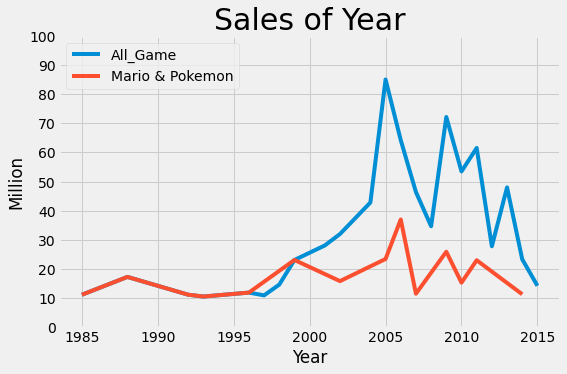

In [36]:
plt.figure(figsize=(8,5))
plt.plot(d4)
plt.plot(mp)
plt.title('Sales of Year',fontsize=30)
plt.yticks(np.arange(0, 110, 10))
plt.ylabel('Million')
plt.xlabel('Year')
plt.legend(['All_Game','Mario & Pokemon'])
plt.show();

- 2010년 이후 출고량 상위를 총게임이 차지하고 있습니다.
- 이를 볼 때 마리오와 포켓몬이 출현하는 총게임을 만들어보는 것도 좋아보입니다.

In [37]:
sales_2010.head(20)

,Name,Platform,Genre,Sales_sum
3414,Grand Theft Auto V,PS3,Action,21.39
10695,Grand Theft Auto V,X360,Action,16.38
2757,Call of Duty: Modern Warfare 3,X360,Shooter,14.76
8892,Call of Duty: Black Ops 3,PS4,Shooter,14.24
4152,Call of Duty: Black Ops II,PS3,Shooter,14.04
6257,Call of Duty: Black Ops II,X360,Shooter,13.74
13814,Call of Duty: Modern Warfare 3,PS3,Shooter,13.47
10901,Mario Kart 7,3DS,Racing,12.21
1973,Grand Theft Auto V,PS4,Action,11.99
4163,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,Role-Playing,11.33


#### PCA 와 클러스터링

In [38]:
df4_scale = df4.iloc[:,5:9]  #PCA에 필요한 컬럼 꺼내옴

game_rank = scaler.fit_transform(df4_scale)  # 데이터표준화
game_rank

pca = PCA(4)                      # PCA 진행
pca.fit(game_rank)
pca_df4 = pca.transform(game_rank)

df_pca = pd.DataFrame(pca_df4, columns = ['pc1','pc2','pc3','pc4']) # pca 데이터프레임 생성

exp = np.around(pca.explained_variance_ratio_,2) # 설명도 변수 설정

- PCA결과 미국과 유럽시장이 매출의 대부분을 차지하고 있기 때문에 서양진출을 염두에 둔 게임 개발을 진행해야합니다.

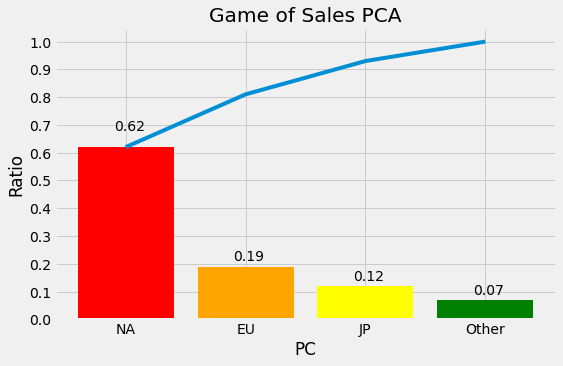

In [39]:
plt.figure(figsize=(8,5))
plt.bar(np.arange(len(exp)),exp,color = ['red', 'orange',  'yellow','green'])
plt.plot(np.arange(len(exp)),np.cumsum(exp))
plt.xticks(np.arange(0, len(exp), 1),labels=['NA','EU','JP','Other'])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.annotate(exp[0],(-0.1,0.68))
plt.annotate(exp[1],(0.9, 0.21))
plt.annotate(exp[2],(1.9,0.14))
plt.annotate(exp[3],(2.9,0.09))
plt.title("Game of Sales PCA")
plt.xlabel("PC")
plt.ylabel("Ratio")
plt.show();

**클러스터링**

In [40]:
df3_cluster = df3.iloc[:,5:9]
df3_cluster

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0.04,0.00,0.00,0.00
1,0.17,0.00,0.00,0.01
2,0.00,0.00,0.02,0.00
3,0.04,0.00,0.00,0.00
4,0.12,0.09,0.00,0.04
...,...,...,...,...
16236,0.15,0.04,0.00,0.01
16237,0.01,0.00,0.00,0.00
16238,0.44,0.19,0.03,0.13
16239,0.05,0.05,0.25,0.03


In [41]:
scaler = StandardScaler()
df3_sc = scaler.fit_transform(df3_cluster)

kmeans = KMeans(n_clusters = 3, random_state=42)
kmeans.fit(df3_sc)

cluster_label = kmeans.labels_
df3_cluster['cluster_label'] = cluster_label

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


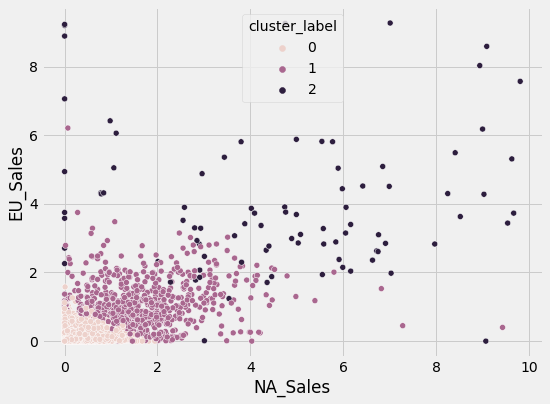

In [42]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = df3_cluster, x = 'NA_Sales', y='EU_Sales', hue = 'cluster_label')
plt.show()

- 1번 군집이 주요 고객임을 확인하였습니다.

In [43]:
df3_cluster[df3_cluster['cluster_label']==0].mean()

NA_Sales         0.148200
EU_Sales         0.072588
JP_Sales         0.052852
Other_Sales      0.023650
cluster_label    0.000000
dtype: float64

In [44]:
df3_cluster[df3_cluster['cluster_label']==1].mean()

NA_Sales         1.539671
EU_Sales         0.961173
JP_Sales         0.301327
Other_Sales      0.315713
cluster_label    1.000000
dtype: float64

In [45]:
df3_cluster[df3_cluster['cluster_label']==2].mean()

NA_Sales         4.422418
EU_Sales         3.812857
JP_Sales         1.989011
Other_Sales      1.368022
cluster_label    2.000000
dtype: float64

# 결론 (어떤 게임을 만들어야 하는가?)

#### 게임 카테고리
- 전체적으로 콘솔게임이 장악하고 있었으나, 현재는 모바일 산업이 두드러지며 게임기 산업 전반이 축소되어 모바일게임으로 진출해야합니다.
- 모바일게임의 불편함을 개선하고자 자사 모바일게임 전용미니 초경량 콘솔을 개발한다면 콘솔 시장의 새로운 전성기를 열수 있을 것입니다.

#### 장르
- 2010년 이후 자료에서 보았듯이 FPS게임이 큰 인기를 끌었기 때문에 신사업을 진행한다면 FPS가 성공확률이 높습니다.
- 또한 확인결과 판매량이 가장 많은 마리오와 포켓몬에서 FPS 장르가 나온적이 거의 없는만큼 콜라보레이션을 진행하면 시너지효과가 있을 것으로 보입니다.

#### 타겟 고객
- PCA결과 미국과 유럽시장이 고객층의 80%이상 차지하고 있기 때문에 서양 진출을 염두에 두고 게임을 개발해야합니다.

# 기타 분석

In [46]:
df5 = pd.melt(df, id_vars =df.columns[0:5] , value_vars=df.columns[5:9],var_name = 'Country', value_name='Sales')

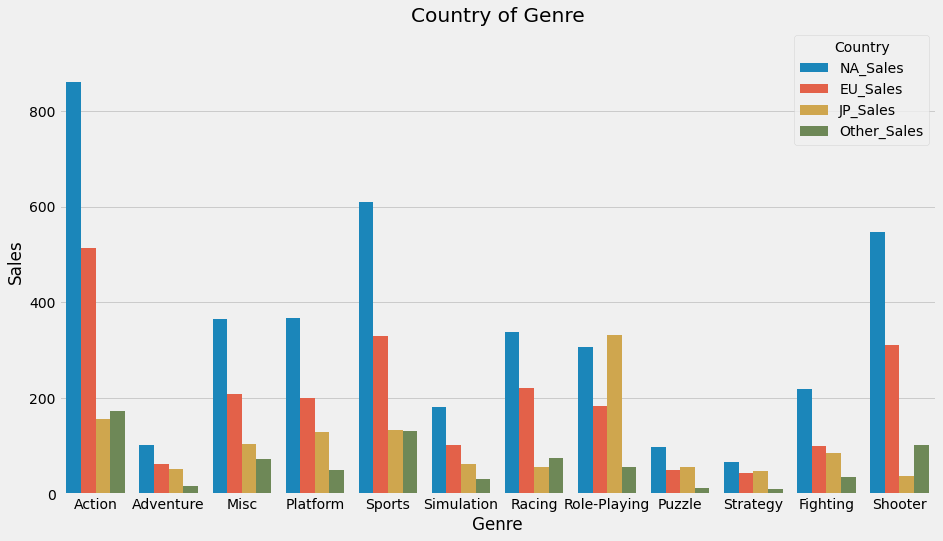

In [47]:
# 장르별 나라 판매량
plt.figure(figsize=(14,8))
sns.barplot(data = df5, x='Genre',y='Sales',hue='Country', errwidth=0, estimator = sum)
plt.title('Country of Genre')
plt.show();

In [48]:
hand_5  = ["WiiU", "DS", "3DS",  "PSP", "PSV", "GBA", "SAT", "GB", "NG", "SCD", "WS"]  
for i in hand_5:
    df5['Platform'] = df5['Platform'].replace(i, "Potable")

consol_5 = ["Wii", "PS", "PS2", "PS3", "PS4",  "XB",  "X360", "XOne", "GC", "N64", "SNES", "NES", "2600", "DC", "GEN", "3DO", "TG16", "GG", "PCFX"]
for j in consol_5:
    df5['Platform'] = df5['Platform'].replace(j,"Consol")

# df5[df5['Platform'].str.contains('([0-9])')==False] # 바뀌지 않은 것 있는지 확인

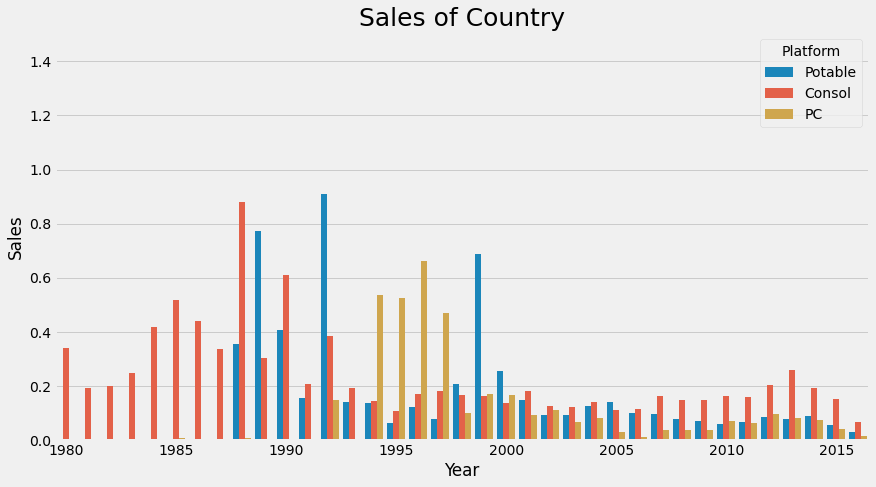

In [49]:
# 게임 플랫폼별 선호도
abc = df5[['Platform','Country','Sales','Year']]

plt.figure(figsize=(13,7))
sns.barplot(data = abc, x='Year',y = 'Sales', hue='Platform',errwidth=0)
plt.title('Sales of Country',fontsize=25 )
plt.xticks(np.arange(0,37,5),np.arange(1980,2017,5))
plt.show();